In [1]:
from Config import Config, plot_rewards
from Env import env_agent_config, all_seed
from Utils import test, train, to_tensor, plot
from Agent import Agent
import d2l.torch as d2l
import torch

/home/wyq/anaconda3/lib/python3.9/site-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


状态空间维度：2，动作空间维度：3
开始训练！
回合：20/100，奖励：-200.00，评估奖励：-200.00，最佳评估奖励：-200.00，更新模型！ 0.05
回合：40/100，奖励：-200.00，评估奖励：-200.00，最佳评估奖励：-200.00，更新模型！ 0.05
回合：60/100，奖励：-200.00，评估奖励：-200.00，最佳评估奖励：-200.00，更新模型！ 0.05
回合：80/100，奖励：-200.00，评估奖励：-200.00，最佳评估奖励：-200.00，更新模型！ 0.05
回合：100/100，奖励：-200.00，评估奖励：-200.00，最佳评估奖励：-200.00，更新模型！ 0.05
完成训练！
一共收集  20000  次数据
开始测试！


/home/wyq/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/wyq/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


回合：1/10，奖励：-200.00
回合：2/10，奖励：-200.00
回合：3/10，奖励：-200.00
回合：4/10，奖励：-200.00
回合：5/10，奖励：-200.00
回合：6/10，奖励：-200.00
回合：7/10，奖励：-200.00
回合：8/10，奖励：-200.00
回合：9/10，奖励：-200.00
回合：10/10，奖励：-200.00
完成测试


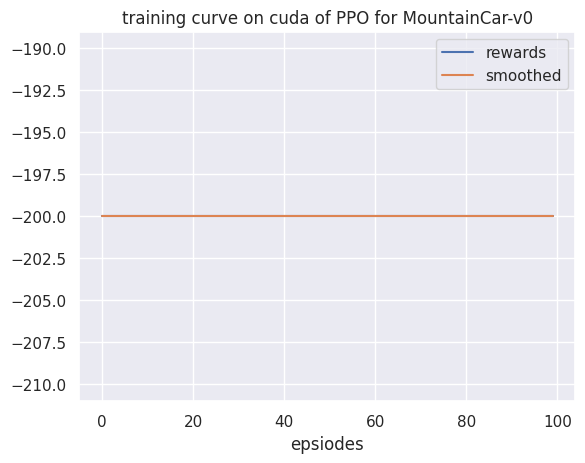

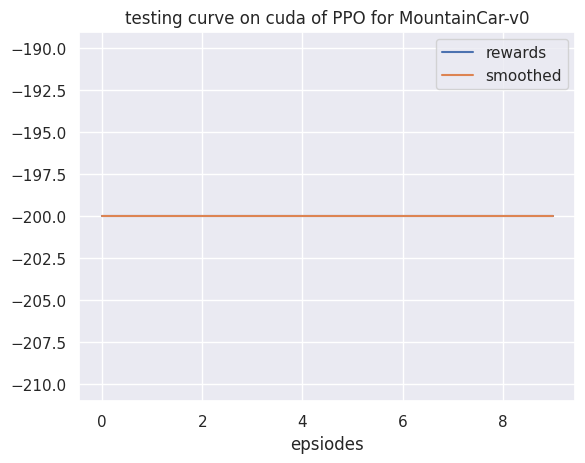

In [3]:
# 获取参数
cfg = Config()
# 训练
env, agent = env_agent_config(cfg)
best_agent,res_dic = train(cfg, env, agent)
 
plot_rewards(res_dic['rewards'], cfg, tag="train")  
# 测试
res_dic = test(cfg, env, best_agent)
plot_rewards(res_dic['rewards'], cfg, tag="test")  # 画出结果

1 tensor(-57.3882) tensor([0.0868, 0.7261, 0.1234, 0.0637])
1 tensor(-57.6537) tensor([0.0991, 0.6872, 0.1385, 0.0752])
0 tensor(-57.9297) tensor([0.1178, 0.6277, 0.1609, 0.0936])
1 tensor(-58.1678) tensor([0.1192, 0.6232, 0.1625, 0.0951])
1 tensor(-58.4278) tensor([0.1408, 0.5542, 0.1870, 0.1180])
2 tensor(-58.6856) tensor([0.1681, 0.4658, 0.2163, 0.1498])
3 tensor(-58.3247) tensor([0.1740, 0.4462, 0.2225, 0.1573])
1 tensor(-58.5243) tensor([0.1538, 0.5121, 0.2013, 0.1328])
2 tensor(-58.7796) tensor([0.1906, 0.3914, 0.2389, 0.1791])
1 tensor(-58.4965) tensor([0.1984, 0.3661, 0.2460, 0.1895])
2 tensor(-58.7351) tensor([0.2357, 0.2454, 0.2835, 0.2354])
0 tensor(-58.1224) tensor([0.2303, 0.2268, 0.2897, 0.2532])
1 tensor(-58.3495) tensor([0.2219, 0.2148, 0.2935, 0.2698])
3 tensor(-58.6059) tensor([0.1914, 0.1744, 0.3040, 0.3303])
0 tensor(-58.7767) tensor([0.2089, 0.1969, 0.2987, 0.2956])
1 tensor(-58.9754) tensor([0.2022, 0.1881, 0.3010, 0.3087])
3 tensor(-59.2086) tensor([0.1739, 0.153

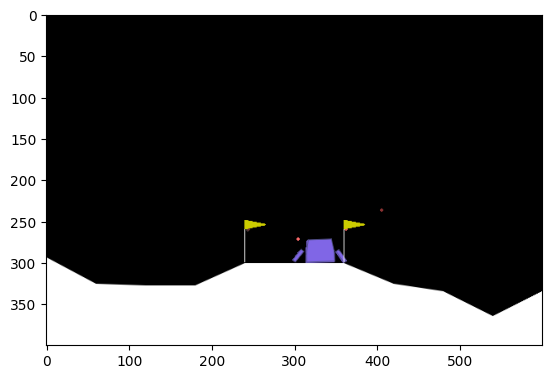

In [11]:
from IPython import display
import matplotlib.pyplot as plt
# cfg = Config() 
# env, agent = env_agent_config(cfg)
# draw_agent = agent
draw_agent = best_agent
draw_agent.actor.eval()
NUM_OF_TEST = 1
test_total_reward = []
action_list = []
actor_out = []
actions = []
critic_list = []
state_list = []
atten_std = []
for i in range(NUM_OF_TEST):
    state = env.reset()
    total_reward = 0
    done = False

    img = plt.imshow(env.render(mode='rgb_array'))
    while not done:
        action = draw_agent.predict_action(state)
        actor_out.append(draw_agent.actor(to_tensor(state, cfg)))
        actions.append(action)
        critic_list.append(draw_agent.critic(to_tensor(state, cfg)))
        state, reward, done, _ = env.step(action)
        atten_std.append(draw_agent.actor.atten.cpu().detach().numpy().std())

        total_reward += reward
        img.set_data(env.render(mode='rgb_array'))
        display.display(plt.gcf())
        display.clear_output(wait=True)

for i in range(len(actor_out)):
    print(actions[i],critic_list[i].detach().cpu()[0],actor_out[i].detach().cpu()[0])
draw_agent.actor.train()
print("length of actions is ", len(actions))


tensor([[[[1.1044e-18, 1.9188e-17, 5.0805e-15, 5.5624e-20, 2.2523e-20,
           2.0895e-18, 1.2500e-01, 1.0559e-17]]]], grad_fn=<ToCopyBackward0>)

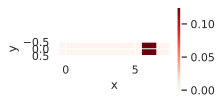

In [6]:
d2l.show_heatmaps(draw_agent.actor.atten.view(1, 1, 1, 8).cpu(), 'x', 'y')
draw_agent.actor.atten.view(1, 1, 1, 8).cpu()

In [7]:
torch.save(best_agent, './Data/LunarLander-v2-StateAttention-None/Ex3.pt')